# Notebook following meeting on Wednesday 28 November

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_palette('colorblind')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20) 
import os
__outdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/Output/'
__datdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/data/KepxDR2/'

In [2]:
df = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyu18.csv')

## Check the proper spherical frame separations $\theta$ are identical to our Euclidian form

In [8]:
def theta_euc(ra, dec):
    thetaij = np.sqrt(np.subtract.outer(ra, ra)**2 + np.subtract.outer(dec, dec)**2)
    return thetaij
def theta_halley(ra, dec):
    thetaij = np.sqrt((np.subtract.outer(ra, ra)*np.cos(0.5*np.add.outer(dec, dec)))**2 + np.subtract.outer(dec, dec)**2)
    return thetaij

In [9]:
t1 = theta_euc(df.ra.values, df.dec.values)
t2 = theta_halley(df.ra.values, df.dec.values)

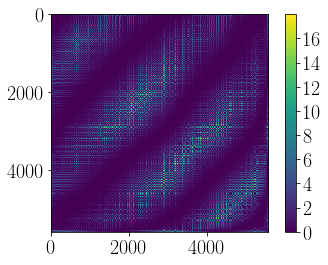

In [10]:
plt.imshow(t1 - t2)
plt.colorbar(label='Difference in separations')
plt.show()

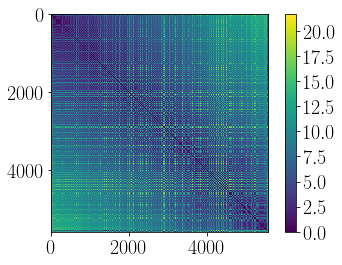

In [36]:
plt.imshow(t1)
plt.colorbar()

Conclusions... needs some more thought?

## Monte Carlo the uncertainties on our $f_{\Delta\nu}$ values

In [27]:
import sys
sys.path.append(os.path.expanduser('~')+'/PhD/Hacks_and_Mocks/asfgrid/')
import asfgrid

def get_fdnu(teff, logz, dnu, numax):
    asf = asfgrid.Seism()
    evstate = np.ones(len(teff))*2

    mass, radius = asf.get_mass_radius(evstate, logz, teff, dnu, numax)
    logg = asf.mr2logg(mass, radius)
    fdnu = asf._get_fdnu(evstate, logz, teff, mass, logg, fill_value='nearest')

    return fdnu

In [28]:
from sklearn.utils import shuffle
sdf = shuffle(df, random_state=24601).reset_index()


Median :1.00465882204
StdDev :0.000983592040718
Fractional Sig : 0.0979030909938

Median :1.00171812311
StdDev :0.001113971169
Fractional Sig : 0.111206051213

Median :1.00452239861
StdDev :0.00489858161624
Fractional Sig : 0.487652801272

Median :1.00499141906
StdDev :0.000636748459375
Fractional Sig : 0.0633585966307

Median :1.0020548362
StdDev :0.00159963851271
Fractional Sig : 0.159635825798

Median :1.00493959248
StdDev :0.00048744001112
Fractional Sig : 0.0485044090977

Median :1.00484816856
StdDev :0.00298424587763
Fractional Sig : 0.296984755607

Median :1.00168044998
StdDev :0.000455747570313
Fractional Sig : 0.0454982994149

Median :0.998181314185
StdDev :0.00152473128493
Fractional Sig : 0.15275093445
('outside interp range', 1000, ' out of ', 1000)
('outside interp range', 1000, ' out of ', 1000)

Median :0.999664113105
StdDev :0.000351703494241
Fractional Sig : 0.0351821666528

Median :1.00207281346
StdDev :0.000459959953012
Fractional Sig : 0.0459008513984

Median :1.00

('outside interp range', 59, ' out of ', 1000)

Median :0.997249776822
StdDev :0.00107265702033
Fractional Sig : 0.107561520219
('outside interp range', 1000, ' out of ', 1000)

Median :1.00209597234
StdDev :0.00660762612313
Fractional Sig : 0.659380568881
('outside interp range', 34, ' out of ', 1000)

Median :1.00289708568
StdDev :0.000967767663404
Fractional Sig : 0.0964972056678

Median :1.00730912301
StdDev :0.00372975525
Fractional Sig : 0.370269182001

Median :1.00185964207
StdDev :0.000799800779137
Fractional Sig : 0.0798316196755

Median :1.00253720674
StdDev :0.00107671630294
Fractional Sig : 0.10739913648


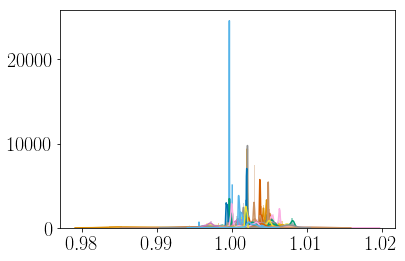

In [34]:
npts = 1000
fdnufracs = []
for idx in range(20):
    teff = np.random.randn(npts)*sdf.Teff_err.values[idx] + sdf.Teff.values[idx]
    logz = np.ones(npts) * np.log10(sdf.Z.values[idx])
    dnu = np.ones(npts) * sdf.dnu.values[idx]
    numax = np.ones(npts) * sdf.numax.values[idx]

    fdnus = get_fdnu(teff, logz, dnu, numax)
    print('\nMedian :{}'.format(np.median(fdnus)))
    print('StdDev :{}'.format(np.std(fdnus)))
    fdnufracs.append(np.std(fdnus)/np.median(fdnus)*100.)
    print('Fractional Sig : {}'.format(fdnufracs[idx]))
    sns.distplot(fdnus)

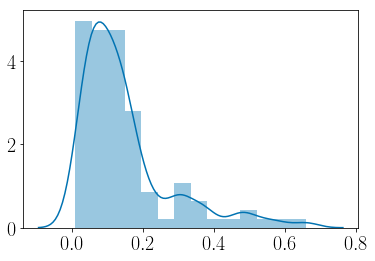

In [35]:
sns.distplot(np.array(fdnufracs))

Conclusions: The fractional uncertainties are not small enough to reasonably ignore when implementation is so simple.

## Monte Carlo the uncertainties on our Bolometric Corrections

...